<a href="https://colab.research.google.com/github/RIXIX/CardProject/blob/main/%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C_%EB%A6%AC%EC%8A%A4%ED%81%AC%EA%B4%80%EB%A6%AC_ver_0.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   명목변수 2개 이상의 종류가 있는 변수
*   순위변수 '순서'의 개념이 존재하는 변수
*   주기변수 '주기'의 개념이 존재하는 변수
*   이산변수 2가지 종류밖에 존재하지않는 변수


다중공선성 문제
  해결방안 : 정규화

In [ ]:
# train.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'work_phone', 'phone', 'email', 'occyp_type', 'family_size',
       'begin_month', 'credit', 'Age', 'ID'],
      dtype='object')

In [ ]:
# from patsy import dmatrices

# y, X = dmatrices('credit ~ Age + family_size + income_type +  gender + car + reality +  child_num + income_total + edu_type + family_type + house_type + DAYS_EMPLOYED + FLAG_MOBIL + work_phone +  phone +  email + occyp_type +  begin_month + ID ' 
#                  , train, return_type = 'dataframe')

# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif["features"] = X.columns 
# vif

KeyboardInterrupt: ignored

In [ ]:
# 정규화
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)##### Your Code Here #####(X_train)
# X_val_scaled = scaler.fit_transform(X_val)

TypeError: ignored

In [4]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [68]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [69]:
#인덱스 제거
train = train.drop(columns = 'index')
test = test.drop(columns = 'index')

In [8]:
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap

     |████████████████████████████████| 81kB 3.3MB/s 
     |████████████████████████████████| 112kB 5.1MB/s 
     |████████████████████████████████| 245kB 5.2MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 112kB 40.1MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 1.1MB 41.7MB/s 
     |████████████████████████████████| 3.1MB 23.6MB/s 
     |████████████████████████████████| 296kB 45.1MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=bae45883a0faf6891d1cb3038f9b2e0d5ebfa20135d69d00dae2d5d1d0ac8231
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=328209e89265bca48a7c014b84e440ca33a1b7d7368385100f671c9a51bc339f
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d8565378

     |████████████████████████████████| 358kB 4.2MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491615 sha256=0483761ee760ba868146306a0bc4cfdda3110abd3bf7417701e3d51c92e97734
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


# 신용카드 사용자 연체 리스크 분석 프로젝트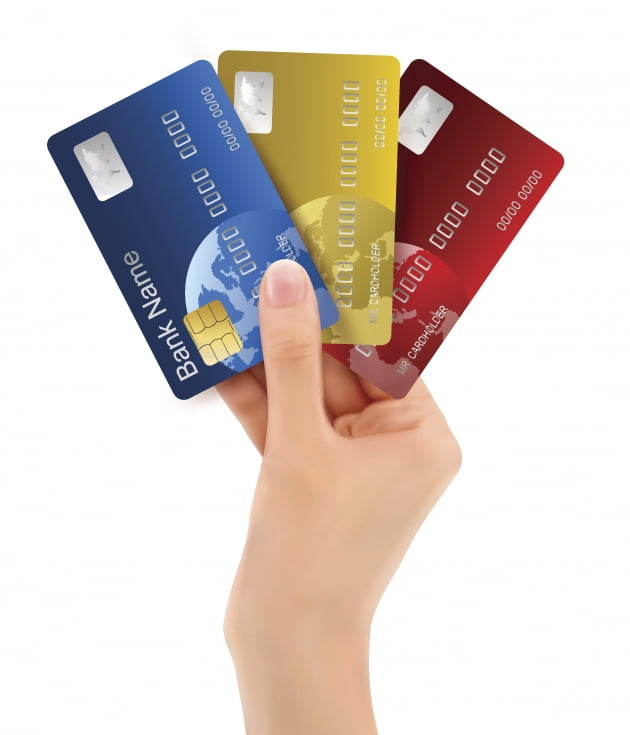

# 1) 데이터 선정 이유 및 문제 정의

  

*   경제관련 도메인을 선호하여 해당 데이터를 선정하였음


*   카드회사에서 발급할 때 사용자(피발급자)의 정보를 통해 연체를 할 확률을 예측하고, 연체 리스크를 줄이고자 함

# 1-1) 데이터 안내서


* gender: 성별


* car: 차량 소유 여부


* reality: 부동산 소유 여부


* child_num: 자녀 수


* income_total: 연간 소득


* income_type: 소득 분류


							['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']



* edu_type: 교육 수준


							['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']



* family_type: 결혼 여부


							['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']



* house_type: 생활 방식


							['Municipal apartment', 'House / apartment', 'With parents',

							

							 'Co-op apartment', 'Rented apartment', 'Office apartment']



* DAYS_BIRTH: 출생일


							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미



* DAYS_EMPLOYED: 업무 시작일


							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미

													

							양수 값은 고용되지 않은 상태를 의미함



* FLAG_MOBIL: 핸드폰 소유 여부


* work_phone: 업무용 전화 소유 여부


* phone: 개인 휴대전화 소유 여부


* email: 이메일 소유 여부


* occyp_type: 직업 유형													


* family_size: 가족 규모


* begin_month: 신용카드 발급 월
			

							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미







* **credit**: 사용자의 신용카드 대금 연체를 기준으로 한 신용도


							=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함

# 2) 데이터를 이용한 가설 및 평가지표, 기준모델

* 본 프로젝트는 리스크관리에 초점을 맞췄으므로, 대금 연체에 관한 변수인 'credit'를 타겟으로 선정

* 또한 credit의 타겟은 (0,1,2)로 되어있지만 1과 2 두개다 리스크이므로 1로 통합하여 연체를 하지 않음 '0'과 연체를 해봤거나, 연체 중 임 '1'로 분석

In [70]:
train.loc[train['credit']>=1, 'credit']=1 # 1과 2를 1로 통합

## 2-1) 베이스 라인

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

major = train['credit'].mode()[0]

y_pred = [major] * len(train)

print('훈련 데이터셋 accuracy : ', accuracy_score(train['credit'], y_pred))
print('훈련 데이터셋 f1-score : ', f1_score(train['credit'],y_pred))

훈련 데이터셋 accuracy :  0.8782174849756208
훈련 데이터셋 f1-score :  0.9351605892296546


*   분류이므로, 최빈값으로 기준모델 구성


*   베이스라인 정확도 0.87


*   아래 그림과 같이, class가 unbalanced하므로, f1 score도 확인 


*   베이스라인 f1-score 0.93






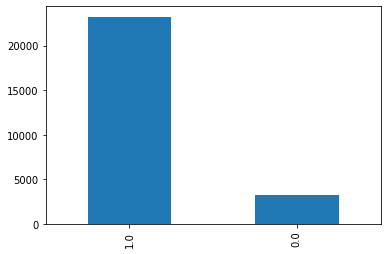

In [72]:
train['credit'].value_counts(sort=False).plot.bar() # 0과 1의 분포

# 3) EDA와 데이터 전처리

In [12]:
from pandas_profiling import ProfileReport

profile = ProfileReport(train, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 3-1)   결측치 확인



In [73]:
train.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [74]:
test.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

In [75]:
# 직업란에 비여있는 결측치도 의미가 있다고 판단, BLANK로 대체

train['occyp_type']=train['occyp_type'].fillna('BLANK')
test['occyp_type']=test['occyp_type'].fillna('BLANK')


# 직업이 비여있고, 기존 경력도 없는 경우 직업란만 비여있는 것과 의미가 다르다고 판단 BLANK2로 대체

train.loc[(train['DAYS_EMPLOYED'] == 0) & (train['occyp_type'] == 'BLANK'), 'occyp_type'] = 'BLANK2'
test.loc[(test['DAYS_EMPLOYED'] == 0) & (test['occyp_type'] == 'BLANK'), 'occyp_type'] = 'BLANK2'




## 3-2)   이상치 확인


### 3-2.1 자녀 수

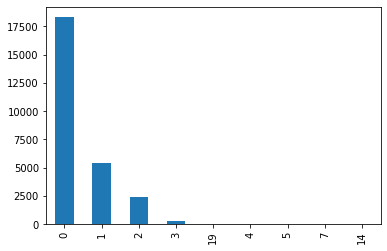

In [76]:
train['child_num'].value_counts(sort=False).plot.bar()

In [77]:
train.loc[train['child_num']>=3, 'child_num']=3
test.loc[test['child_num']>=3, 'child_num']=3

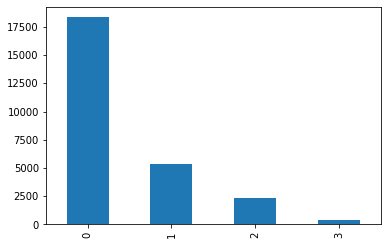

In [78]:
train['child_num'].value_counts(sort=False).plot.bar()


*   child_num(자식 수)가 3이상인 것은 3으로 통합

*   기준이 3이상인 경우 다자녀 가족으로 묶을 수 있다고 판단



### 3-2.2 가족의 규모

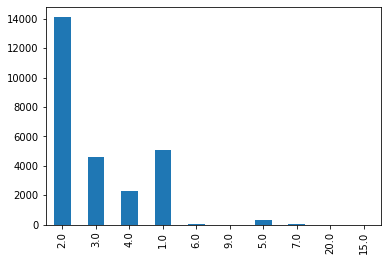

In [79]:
train['family_size'].value_counts(sort=False).plot.bar()

In [80]:
train.loc[train['family_size']>=5, 'family_size']=5
test.loc[test['family_size']>=5, 'family_size']=5

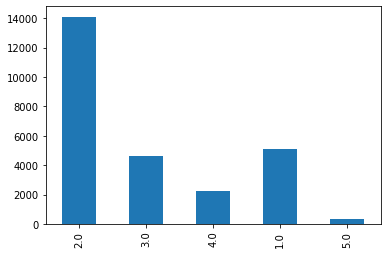

In [81]:
train['family_size'].value_counts(sort=False).plot.bar()

*   family_size(가족의 크기)가 5이상인 것은 5으로 통합

*   기준이 5인 이유는 5이상부터, 대가족으로 묶을 수 있다고 판단




### 3-2.3 나이



In [82]:
train['Age'] = train['DAYS_BIRTH']*(-1) // 365
test['Age'] = test['DAYS_BIRTH']*(-1) // 365

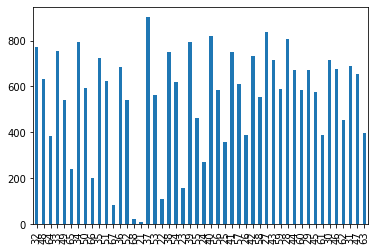

In [83]:
train['Age'].value_counts(sort=False).plot.bar()

In [84]:
train = train.drop(['DAYS_BIRTH'], axis=1)
test = test.drop(['DAYS_BIRTH'], axis=1)

In [ ]:
#구간화
count, bin_dividers =np.histogram(train['Age'], bins=10)
bin_names=['Age_Sort'+str(i) for i in range(10,110,10) ]

train['Age']=pd.cut(x=train['Age'], bins=bin_dividers, labels=bin_names, include_lowest=True)
test['Age']=pd.cut(x=test['Age'], bins=bin_dividers, labels=bin_names, include_lowest=True)

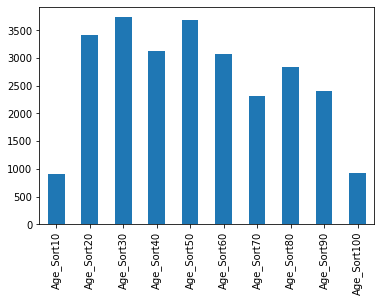

In [87]:
train['Age'].value_counts(sort=False).plot.bar()

데이터 수집 당시 (0)부터 역으로 세며 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

-> 쉽게 설명하면, 나이를 20대, 30대 등으로 구별한 것입니다.

### 3-2.4 신용카드 발급 월

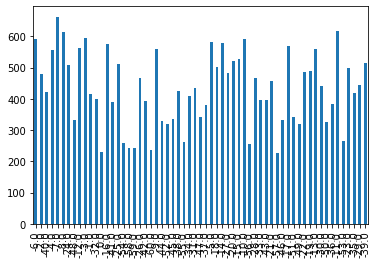

In [88]:
train['begin_month'].value_counts(sort=False).plot.bar()

In [89]:
#구간화
count, bin_dividers =np.histogram(train['begin_month'], bins=30)
bin_names=['begin_month_Sort'+str(i) for i in range(30) ]
#bin_dividers는 train기준!!
train['begin_month']=pd.cut(x=train['begin_month'], bins=bin_dividers, labels=bin_names, include_lowest=True)
test['begin_month']=pd.cut(x=test['begin_month'], bins=bin_dividers, labels=bin_names, include_lowest=True)

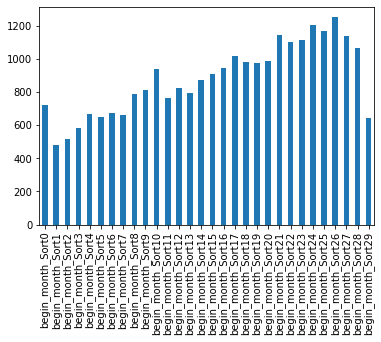

In [90]:
train['begin_month'].value_counts(sort=False).plot.bar()

## 3-3) 파생변수 생성

해당 데이터 설명에 따르면, 중복이 있으며 중복에 대한 구분이 필요하다고 함 (한  사람이 여러장의 카드를 발급받는 경우)

발급일자를 제외한 나머지 속성들의 조합으로 복합키 생성

In [91]:
# 중복 발급자를 구분하기 위한, 키 생성

train['ID'] = train['child_num'].astype(str) + '_' + train['income_total'].astype(str) + '_' + \
train['Age'].astype(str) + '_' + train['Age'].astype(str) + '_' + \
train['work_phone'].astype(str) + '_' + train['phone'].astype(str) + '_' + \
train['email'].astype(str) + '_' + train['family_size'].astype(str) + '_' + \
train['gender'].astype(str) + '_' + train['car'].astype(str) + '_' + \
train['reality'].astype(str) + '_' + train['income_type'].astype(str) + '_' + \
train['edu_type'].astype(str) + '_' + train['family_type'].astype(str) + '_' + \
train['house_type'].astype(str) + '_' + train['occyp_type'].astype(str)


In [92]:

test['ID'] = test['child_num'].astype(str) + '_' + test['income_total'].astype(str) + '_' + \
test['Age'].astype(str) + '_' + test['Age'].astype(str) + '_' + \
test['work_phone'].astype(str) + '_' + test['phone'].astype(str) + '_' + \
test['email'].astype(str) + '_' + test['family_size'].astype(str) + '_' + \
test['gender'].astype(str) + '_' + test['car'].astype(str) + '_' + \
test['reality'].astype(str) + '_' + test['income_type'].astype(str) + '_' + \
test['edu_type'].astype(str) + '_' + test['family_type'].astype(str) + '_' + \
test['house_type'].astype(str) + '_' + test['occyp_type'].astype(str)


## 3-4) 분석에 불필요한 속성 제거
 : 휴대폰 여부, 예측 성능을 저하시키며 휴대폰은 다 가지고 있는 것을 감안 했을 때 제거

In [93]:
train = train.drop(['FLAG_MOBIL'], axis=1)
test = test.drop(['FLAG_MOBIL'], axis=1)

## 3-5) 인코딩

In [94]:
train['gender'] = train['gender'].replace(['F','M'],[0,1])
test['gender'] = test['gender'].replace(['F','M'],[0,1])
print('성별 :')
print(train['gender'].value_counts())
print('--------------')

print('차 소유 여부 : ')
train['car'] = train['car'].replace(['N','Y'],[0,1])
test['car'] = test['car'].replace(['N','Y'],[0,1])
print(train['car'].value_counts())
print('--------------')

print('부동산 소유 여부 : ')
train['reality'] = train['reality'].replace(['N','Y'],[0,1])
test['reality'] = test['reality'].replace(['N','Y'],[0,1])
print(train['reality'].value_counts())

성별 :
0    17697
1     8760
Name: gender, dtype: int64
--------------
차 소유 여부 : 
0    16410
1    10047
Name: car, dtype: int64
--------------
부동산 소유 여부 : 
1    17830
0     8627
Name: reality, dtype: int64


In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

train['income_type']=label_encoder.fit_transform(train['income_type'])
test['income_type']=label_encoder.transform(test['income_type'])

train['edu_type']=label_encoder.fit_transform(train['edu_type'])
test['edu_type']=label_encoder.transform(test['edu_type'])

train['family_type']=label_encoder.fit_transform(train['family_type'])
test['family_type']=label_encoder.transform(test['family_type'])

train['house_type']=label_encoder.fit_transform(train['house_type'])
test['house_type']=label_encoder.transform(test['house_type'])

train['income_total']=label_encoder.fit_transform(train['income_total'])
test['income_total']=label_encoder.fit_transform(test['income_total'])

train['occyp_type']=label_encoder.fit_transform(train['occyp_type'])
test['occyp_type']=label_encoder.fit_transform(test['occyp_type'])

train['begin_month']=label_encoder.fit_transform(train['begin_month'])
test['begin_month']=label_encoder.fit_transform(test['begin_month'])

train['Age']=label_encoder.fit_transform(train['Age'])
test['Age']=label_encoder.fit_transform(test['Age'])

train['ID']=label_encoder.fit_transform(train['ID'])
test['ID']=label_encoder.fit_transform(test['ID'])

## 3-6) 모델링에 선정된 최종 속성 리스트

In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  int64  
 1   car            26457 non-null  int64  
 2   reality        26457 non-null  int64  
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  int64  
 5   income_type    26457 non-null  int64  
 6   edu_type       26457 non-null  int64  
 7   family_type    26457 non-null  int64  
 8   house_type     26457 non-null  int64  
 9   DAYS_EMPLOYED  26457 non-null  int64  
 10  work_phone     26457 non-null  int64  
 11  phone          26457 non-null  int64  
 12  email          26457 non-null  int64  
 13  occyp_type     26457 non-null  int64  
 14  family_size    26457 non-null  float64
 15  begin_month    26457 non-null  int64  
 16  credit         26457 non-null  float64
 17  Age            26457 non-null  int64  
 18  ID    

# 4) 모델링 (Modeling)

* 트레이닝셋(100%)를 랜덤으로 검증데이터(20%) 훈련데이터(80%) 분배


* 80%로 모델을 훈련하고, 20%로 검증을 진행

In [101]:
from sklearn.model_selection import train_test_split
target = 'credit'

train, val = train_test_split(train, train_size=0.8, test_size=0.2, 
                              stratify=train[target], random_state=2)

In [102]:

X_train = train.drop(columns = target)
y_train = train[target]
X_val = val.drop(columns = target)
y_val = val[target]


In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder
from category_encoders import TargetEncoder

pipe_RF = make_pipeline( 
    RandomForestClassifier(n_estimators=100, max_depth=10,random_state=2, n_jobs=-1, class_weight='balanced')
)

pipe_RF.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=10,
                                        max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=2,
                                        verbose=0, warm_start=False))],
         verbose=False)

## 4-1) 랜덤포레스트 모델링

In [104]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

y_pred = pipe_RF.predict(X_train)

print('훈련데이터셋 f1-score : ', f1_score(y_train, y_pred))

print(classification_report(y_train, pipe_RF.predict(X_train)))

훈련데이터셋 f1-score :  0.9285714285714287
              precision    recall  f1-score   support

         0.0       0.50      0.75      0.60      2062
         1.0       0.96      0.90      0.93     14870

    accuracy                           0.88     16932
   macro avg       0.73      0.82      0.76     16932
weighted avg       0.91      0.88      0.89     16932



Text(0.5, 1.0, 'Confusion matrix, n = 4233')

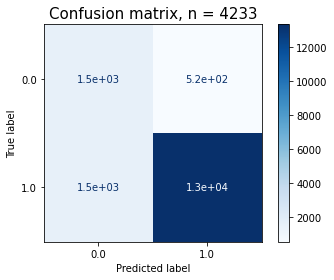

In [105]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe_RF, X_train, y_train,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)

In [106]:
threshold = 0.5
y_pred_proba = pipe_RF.predict_proba(X_train)[:, 1]
y_pred = y_pred_proba > threshold

y_pred_proba

array([0.57972741, 0.51020934, 0.67835542, ..., 0.5442736 , 0.60761669,
       0.55822015])

Text(0, 0.5, 'TPR')

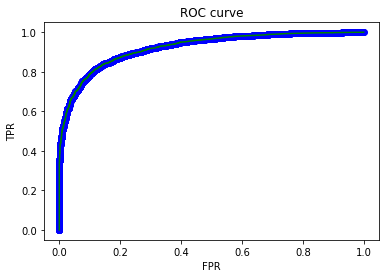

In [107]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)

plt.scatter(fpr, tpr, color='blue')
plt.plot(fpr, tpr, color='green')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [108]:
from sklearn.metrics import roc_auc_score

y_pred_proba = pipe_RF.predict_proba(X_train)[:, -1]
print('AUC score: ', roc_auc_score(y_train, y_pred_proba))

AUC score:  0.9232481212865201


In [109]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)

idx: 2144 , threshold: 0.5214133321282955


In [110]:
y_pred_optimal = y_pred_proba >= threshold
print('최적의 임계값 수정 후  f1-score : ', f1_score(y_train, y_pred_optimal))
print(classification_report(y_train, y_pred_optimal))

최적의 임계값 수정 후  f1-score :  0.9285714285714287
              precision    recall  f1-score   support

         0.0       0.50      0.75      0.60      2062
         1.0       0.96      0.90      0.93     14870

    accuracy                           0.88     16932
   macro avg       0.73      0.82      0.76     16932
weighted avg       0.91      0.88      0.89     16932



### 4-1.1 랜덤포레스트 K_FOLD(K=5) 모델의 범용성 확인

In [111]:
from sklearn.model_selection import cross_val_score

k=5

scores = cross_val_score(pipe_RF, X_train, y_train, cv=k, 
                         scoring='f1')

print(scores)

[0.89661017 0.88809402 0.9059714  0.89159892 0.89078208]


In [112]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

y_pred = pipe_RF.predict(X_val)

print('검증셋 f1-score : ' , f1_score(y_val, y_pred))

print(classification_report(y_val, pipe_RF.predict(X_val)))

검증셋 f1-score :  0.8851379168382051
              precision    recall  f1-score   support

         0.0       0.26      0.33      0.29       516
         1.0       0.90      0.87      0.89      3717

    accuracy                           0.80      4233
   macro avg       0.58      0.60      0.59      4233
weighted avg       0.82      0.80      0.81      4233



## 4-2)딥러닝 다층 퍼셉트론

In [113]:

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
import keras
import tensorflow as tf
import IPython
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers.recurrent import LSTM


In [ ]:
!pip install -U keras-tuner
import kerastuner as kt

### 4-2.1 다층 퍼셉트론, 정규화 과정

In [115]:
# 정규화

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)


In [116]:

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



In [156]:
tf.random.set_seed(100)

model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.01), 
              loss='binary_crossentropy', 
              metrics=['accuracy',f1_m])

results = model.fit(X_train_scaled, y_train, epochs=30, batch_size=10, validation_data=(X_val_scaled,y_val))

Epoch 1/30
1694/1694 [==============================] - 5s 2ms/step - loss: 0.3840 - accuracy: 0.8781 - f1_m: 0.9318 - val_loss: 0.3711 - val_accuracy: 0.8781 - val_f1_m: 0.9317
Epoch 2/30
1694/1694 [==============================] - 3s 2ms/step - loss: 0.3710 - accuracy: 0.8782 - f1_m: 0.9318 - val_loss: 0.3707 - val_accuracy: 0.8781 - val_f1_m: 0.9317
Epoch 3/30
1694/1694 [==============================] - 4s 2ms/step - loss: 0.3710 - accuracy: 0.8782 - f1_m: 0.9319 - val_loss: 0.3707 - val_accuracy: 0.8781 - val_f1_m: 0.9317
Epoch 4/30
1694/1694 [==============================] - 3s 2ms/step - loss: 0.3708 - accuracy: 0.8782 - f1_m: 0.9320 - val_loss: 0.3709 - val_accuracy: 0.8781 - val_f1_m: 0.9317
Epoch 5/30
1694/1694 [==============================] - 3s 2ms/step - loss: 0.3711 - accuracy: 0.8782 - f1_m: 0.9317 - val_loss: 0.3707 - val_accuracy: 0.8781 - val_f1_m: 0.9317
Epoch 6/30
1694/1694 [==============================] - 3s 2ms/step - loss: 0.3708 - accuracy: 0.8782 - f1_m: 

### 4-2.2 CV

In [153]:
# GridSearch CV를 만들기

tf.random.set_seed(7)

def model_builder(nodes=16, activation='relu'):
  model7 = Sequential()
  model7.add(Dense(32, activation='relu'))
  model7.add(Dropout(0.4))
  model7.add(Dense(64, activation='relu'))
  model7.add(Dropout(0.3))
  model7.add(Dense(32, activation='relu'))
  model7.add(Dropout(0.2))
  model7.add(Dense(1, activation='sigmoid')) 
  
  model7.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy',f1_m,precision_m, recall_m])

  return model7

# keras.wrapper를 활용하여 분류기를 만듭니다
model7 = KerasClassifier(build_fn=model_builder, verbose=0)

# GridSearch
batch_size = [50, 100, 300]
epochs = [10, 20, 30]
activation = ['relu', 'sigmoid']
param_grid = dict(batch_size=batch_size, epochs=epochs, nodes=nodes, activation=activation)


# GridSearch CV를 만들기
grid = GridSearchCV(estimator=model7, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_val_scaled, y_val)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 12.9min finished


In [154]:
# 최적의 결과값을 낸 파라미터를 출력합니다
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.8782187501589457 using {'activation': 'relu', 'batch_size': 50, 'epochs': 10, 'nodes': 64}
Means: 0.8782187501589457, Stdev: 0.002839798456866025 with: {'activation': 'relu', 'batch_size': 50, 'epochs': 10, 'nodes': 64}
Means: 0.8782187501589457, Stdev: 0.002839798456866025 with: {'activation': 'relu', 'batch_size': 50, 'epochs': 10, 'nodes': 128}
Means: 0.8782187501589457, Stdev: 0.002839798456866025 with: {'activation': 'relu', 'batch_size': 50, 'epochs': 10, 'nodes': 256}
Means: 0.8782187501589457, Stdev: 0.002839798456866025 with: {'activation': 'relu', 'batch_size': 50, 'epochs': 20, 'nodes': 64}
Means: 0.8782187501589457, Stdev: 0.002839798456866025 with: {'activation': 'relu', 'batch_size': 50, 'epochs': 20, 'nodes': 128}
Means: 0.8782187501589457, Stdev: 0.002839798456866025 with: {'activation': 'relu', 'batch_size': 50, 'epochs': 20, 'nodes': 256}
Means: 0.8782187501589457, Stdev: 0.002839798456866025 with: {'activation': 'relu', 'batch_size': 50, 'epochs': 30, 'nodes'

In [124]:
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_distributions = { 
    'n_estimators': range(50, 100, 10), 
    'max_depth': range(1,10,2),
}

search = RandomizedSearchCV(
    RandomForestClassifier(random_state=2, class_weight = 'balanced'),
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=5,
    scoring='f1', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=2
)

In [125]:
search.fit(X_val, y_val);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.5s finished


In [127]:
print(search.best_params_)
print(search.best_score_)

{'n_estimators': 80, 'max_depth': 9}
0.9141119136671156


In [128]:
model2 = search.best_estimator_

* 랜덤포레스트 검증세트 f1-score 0.88

* 인공 신경망 검증세트 f1-score 0.93

* 신경망 모델의 f1-score가 랜덤포레스트보다 높으며, 베이스라인(0.93)과 유사

* 최종모델은 인공신경망을 선택한다



# 5) 모델 해석

## 속성 중요도





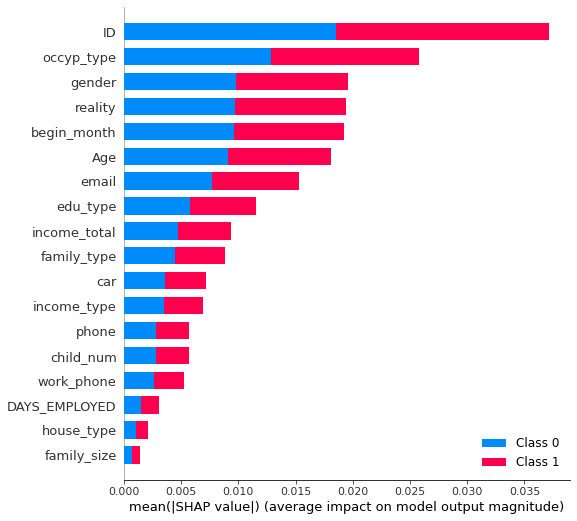

In [148]:
import shap

explainer = shap.TreeExplainer(model2)

shap.summary_plot(shap_values, X_train.iloc[:300],plot_type="bar")

## 서비스 시나리오(SHAP)

In [147]:
import shap

row = X_val.iloc[[1]]

explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], features=row, link='logit')

In [137]:
feature_names = X_train.columns
feature_values = row.values[0]
shaps = pd.Series(shap_values[0][0], zip(feature_names, feature_values))

pros = shaps.sort_values(ascending=False)[:3].index
cons = shaps.sort_values(ascending=True)[:3].index


print('연체할 확률 요인 Top 3 입니다:')
for i, pro in enumerate(pros, start=1):
    feature_name, feature_value = pro
    print(f'{i}. {feature_name} : {feature_value}')



print('\n')
print('연체하지 않은 확률 요인 Top 3 입니다:')
for i, con in enumerate(cons, start=1):
    feature_name, feature_value = con
    print(f'{i}. {feature_name} : {feature_value}')

연체할 확률 요인 Top 3 입니다:
1. Age : 3.0
2. email : 0.0
3. family_type : 1.0


연체하지 않은 확률 요인 Top 3 입니다:
1. ID : 1919.0
2. occyp_type : 7.0
3. gender : 1.0


# 6) requirement.txt 저장

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip freeze --local > /content/gdrive/My\ Drive/Study/colab_installed.txt

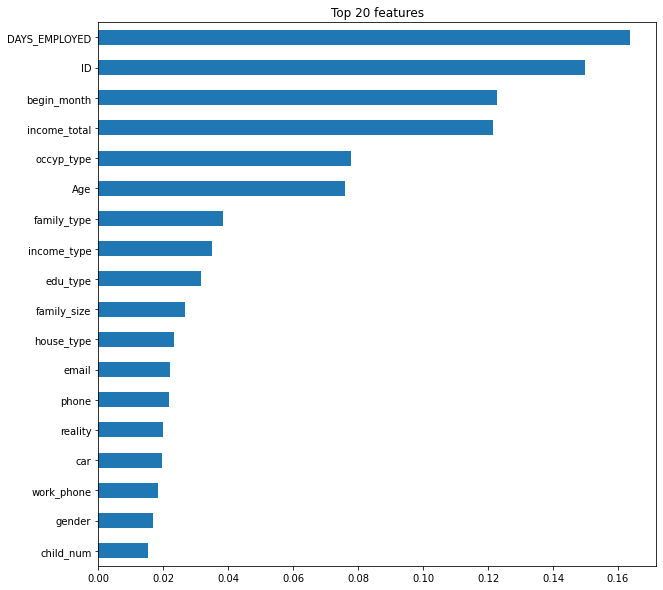

In [133]:
# # 특성 중요도
# rf = model2
# importances = pd.Series(rf.feature_importances_, X_train.columns)

# %matplotlib inline
# import matplotlib.pyplot as plt

# n = 20
# plt.figure(figsize=(10,n/2))
# plt.title(f'Top {n} features')
# importances.sort_values()[-n:].plot.barh();

4-2.2 하이퍼파라미터 튜닝

In [118]:
# 모델 만들기

def model_builder(hp):

  model = Sequential()

  # Dense layer에서 노드 수를 조정(32-512)
  hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)

  model.add(Dense(units = hp_units, activation='relu'))
  model.add(Dense(units = hp_units, activation='relu'))

  model.add(Dense(1, activation='sigmoid')) # 이진분류니까 노드수 1, 활성함수로는 시그모이드

  # Optimizer의 학습률(learning rate)을 조정[0.01, 0.001, 0.0001]합니다. 
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  # 컴파일 단계, 옵티마이저와 손실함수, 측정지표를 연결해서 계산 그래프를 구성함
  model.compile(optimizer=keras.optimizers.Adam(learning_rate = hp_learning_rate), 
                loss=keras.losses.BinaryCrossentropy(from_logits = True), 
                metrics=['accuracy'])

  return model

In [119]:
# 튜너를 인스턴스화하고 하이퍼 튜닝을 수행

tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 30, 
                     factor = 3,
                     directory = 'my_dir',
                     project_name = 'intro_to_kt')

In [120]:
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [121]:
tuner.search(X_train_scaled, y_train, epochs = 30, batch_size=50, validation_data = (X_val_scaled,y_val), callbacks = [ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
최적화된 Dense 노드 수 : {best_hps.get('units')} 
최적화된 Learning Rate : {best_hps.get('learning_rate')} 
""")

Trial 62 Complete [00h 00m 05s]
val_accuracy: 0.8781006336212158

Best val_accuracy So Far: 0.8797543048858643
Total elapsed time: 00h 05m 39s
INFO:tensorflow:Oracle triggered exit

최적화된 Dense 노드 수 : 224 
최적화된 Learning Rate : 0.001 



In [122]:
from tensorflow.keras import regularizers

tf.random.set_seed(1442)
initializer = tf.keras.initializers.HeNormal()

model = Sequential()

model.add(Dense(best_hps.get('units'), 
                activation='relu', kernel_initializer=initializer,          
                kernel_regularizer=regularizers.l2(0.001),    # L2 norm regularization
                activity_regularizer=regularizers.l1(0.001))) # L1 norm regularization))
model.add(Dense(best_hps.get('units'),
                activation='relu', kernel_initializer=initializer,            
                kernel_regularizer=regularizers.l2(0.001),    # L2 norm regularization
                activity_regularizer=regularizers.l1(0.001)))
model.add(Dense(1, activation='sigmoid')) # 이진분류니까 노드수 1, 활성함수로는 시그모이드

model.compile(optimizer=keras.optimizers.Adam(learning_rate = best_hps.get('learning_rate')), 
              loss='binary_crossentropy', 
              metrics=['accuracy',f1_m,precision_m,recall_m])

results = model.fit(X_train_scaled, y_train, epochs=2, batch_size=50, validation_data=(X_val_scaled,y_val))

Epoch 1/2
339/339 [==============================] - 2s 4ms/step - loss: 1.1307 - accuracy: 0.8780 - f1_m: 0.9344 - precision_m: 0.8784 - recall_m: 0.9996 - val_loss: 0.8693 - val_accuracy: 0.8781 - val_f1_m: 0.9342 - val_precision_m: 0.8776 - val_recall_m: 1.0000
Epoch 2/2
339/339 [==============================] - 1s 3ms/step - loss: 0.7151 - accuracy: 0.8782 - f1_m: 0.9345 - precision_m: 0.8782 - recall_m: 1.0000 - val_loss: 0.6071 - val_accuracy: 0.8781 - val_f1_m: 0.9342 - val_precision_m: 0.8776 - val_recall_m: 1.0000
